In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #window
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False #한글 사용할 때 마이너스 기호 깨지는것을 해결

# 8. 차원 축소

- 차원의 저주: 차원이 증가하면서 학습 데이터 수가 차원 수보다 적어저 성능이 저하되는 현상
    - 너무 많은 특성들로 인해 성능이 저하되는 것.
--- 
특성 수를 크게 줄여서 불가능한 문제를 가능한 범위로 만들 수 있다.  
하지만 그 전에, 원본 데이터로 훈련을 먼저 해봐야 한다.(훈련이 너무 느린지 판단)  
만약 너무 느리다면, 훈련 데이터의 차원을 축소시켜 성능을 높일 수 있다.(또는 속도가 빨라질 수 있다)
--- 
차원을 줄여서 데이터를 시각화 할 수 있다면, 데이터의 패턴을 파악할 수 있고 이를 통해 중요한 통찰을 얻을 수도 있다.

# 8.1 차원의 저주

- 간단하게 생각하면
    - 1차원은 0차원 2개를 연결시킨 것이고, 2차원은 1차원 2개의 꼭짓점들을 연결시킨 것 
    - 3차원은 2차원 2개의 꼭짓점을 연결시킨 것이다
    - 4차원도 그릴 수는 있음!
    - 그 이상의 고차원은 상상하기 힘들다... 그리기도 어렵다
--- 
#### 고차원의 문제점
##### 끝 부분에 있는 점을 선택할 가능성이 높아진다! 
    - 2차원 사각형(1 X 1)에서 테두리 0.001을 제외한 안쪽 사각형의 면적: $(1- 0.001 X 2)^2 = 0.996$
    - 고차원 초입방체에서의 면적: $(1-0.001 X 2)^{10000} \approx 0.0000002$
##### 대부분의 훈련 데이터가 서로 멀리 떨어져있다.
    - 따라서 예측이 불안정해지고, 과대적합 위험이 커진다.
##### 다중 공산성 문제
    - 서로 강한 상관관계를 보이는 특성들이 있고, 이를 학습시키면 과대적합 위험이 커진다.

# 8.2 차원 축소를 위한 접근 방법

## 8.2.1 투영 

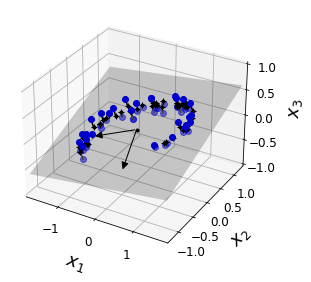

- 3차원의 데이터 샘플 중 대부분이, 2차원 공간에 놓여있다.
    - 고차원 공간의 저차원 부분공간에 놓여있다.
    - 이것을 부분 공간에 수직으로 투영하면 아래와 같은 2차원 데이터셋이 나온다.
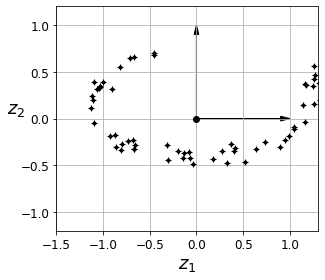

- 스위스 롤의 경우 2차원 공간에 투영했을 때, 스위스 롤의 층이 왼쪽의 그림처럼 서로 뭉개지는 경우가 발생한다.
- 따라서 스위스 롤의 경우 투영을 사용X
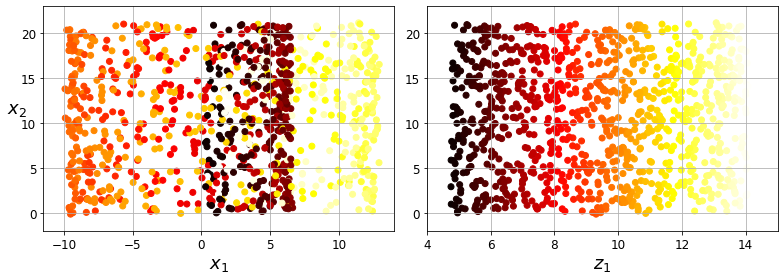

## 8.2.2 매니폴드 학습

- 매니폴드 학습이란 고차원의 데이터를 가장 잘 투영할 수 있는 매니폴드를 찾는것이다. 
    - 매니폴드 가정: 대부분 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 가정
    - 매니폴드: 고차원의 데이터를 가장 잘 표현하는 부분 공간
    - 매니폴더를 잘 찾는것이 매니폴드 학습이고, 잘 찾은 매니폴드에 투영시키면 차원 축소 가능
    #### 이런 매니폴드 가정은 다른 가정과 병행하는 경우가 많다
    - 저차원의 매니폴드 공간에 표현되면 작업이 간단해질 것이라는 가정.
    - 하지만 이런 가정이 항상 유효하지는 않다. 
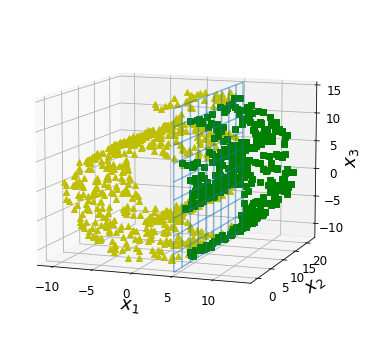
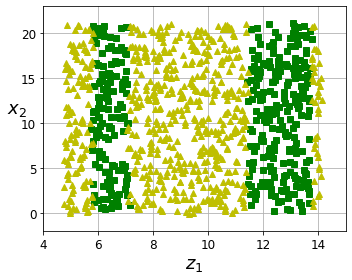

위쪽 그림은 하나의 결정경계를 가지지만, 위의 스위스롤을 저차원 공간에 뿌렸을 때,   
펼쳐진 매니폴드에서는 오히려 4개의 결경경계가 생겼다.(더 복잡해졌다)
--- 
### 결론
차원을 축소하는 것은 훈련 속도를 증가시키는데 유용하지만, 항상 더 간단한 방법이 되는 것은 아니다.  
전적으로 데이터 셋에 달렸다.  
실제로 어떤 데이터 셋에서는 차원을 높임으로써 매니폴드 학습을 하는 경우도 있다.(고차원으로 투영)

# 8.3 PCA

- 주성분 분석(principal component analysis, PCA)은 가장 인기 있는 차원 축소 알고리즘이다. 
    - 데이터에 가장 가까운 초평면을 정의하고, 데이터를 평면에 투영.

## 8.3.1 분산 보존

- 올바른 초평면(hyperplane)을 정의해야한다.
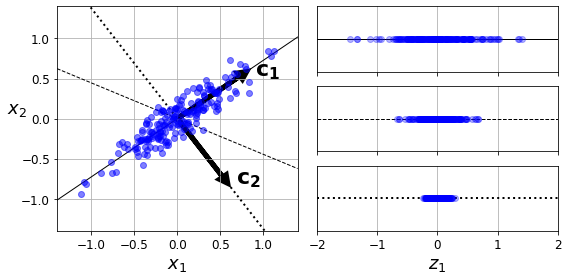
분산을 최대로 보존되는 축을 선택하는 것이 정보의 손실을 최대한 막을 수 있다.(위에서 실선)  
즉, 원본 데이터셋과 투영된 것 사이의 평균 제곱 거리를 최소화 하는 축이다.

## 8.3.2 주성분

- PCA: 훈련 세트에서 분산이 최대인 축을 찾고(첫번째 축), 이 축에 직교하면서 남은 분산을 최대한 보존하는 두번째 축을 찾는다.
    - 고차원 데이터셋이라면, PCA는 이전 두개의 축에 직교하는 세번째 축을 찾고, 데이터셋의 차원 수만큼 n번째 축을 찾는다.<br><br>
- 이 때, $i$번째 축을 이 데이터의 $i$번째 주성분(principal component, PC)이라고 한다.
--- 
#### 훈련 세트의 주성분을 찾는 방법:SVD(특잇값 분해)
- 훈련 세트 행렬 $X$를 세 개 행렬의 행렬 곱셉인 $U\sum V^T$로 분해.

#### 항상 PCA는 데이터셋의 평균이 0이라고 가정하기 때문에, 데이터셋을 원점에 맞춰줘야한다.(평균을 0으로)

In [14]:
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5 #60개의 표준정규분포 난수에 3과 원주율을 곱하고 
                                                  #2로 나눠준 후 0.5를 곱해준다.
    
X = np.empty((m, 3)) #zeros와 같은데, 메모리 초기화를 생략하기 때문에 그냥 의미 없는 값을 출력함

#X의 각 열값을 표현
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)


X_centered = X - X.mean(axis=0) #각 열의평균을 빼줌 => 데이터를 중앙에 맞춰줘야 한다.
#PCA는 데이터셋의 평균이 0이라고 가정하기 때문이다.

U, s, Vt = np.linalg.svd(X_centered) #특잇값 분해를 해줌
#U는 60 x 60, s는 3 x 1, Vt는 3 x 3
c1 = Vt.T[:, 0] #c1은 Vt의 첫번째 행(Vt를 전치시켰기 때문에) = 첫번째 주성분
c2 = Vt.T[:, 1] #c2는 Vt의 두번째 행  = 두번째 주성분!!
#vt가 전치되어있었기 때문에, 다시 전치해준것~!
#c1, c2가 주성분이다.
#주성분 행렬(Vt)을 생각,,

#실제로 곱할 때는, s를 대각행렬로 만들어서 곱한다

In [15]:
print(s.shape)
print(U.shape)
print(Vt.shape)

(3,)
(60, 60)
(3, 3)


In [16]:
print(Vt)
print(Vt.T)

[[ 0.93636116  0.29854881  0.18465208]
 [-0.34027485  0.90119108  0.2684542 ]
 [-0.08626012 -0.31420255  0.94542898]]
[[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [17]:
print(Vt)
print(c1)
print(c1.shape)

[[ 0.93636116  0.29854881  0.18465208]
 [-0.34027485  0.90119108  0.2684542 ]
 [-0.08626012 -0.31420255  0.94542898]]
[0.93636116 0.29854881 0.18465208]
(3,)


In [18]:
np.diag(s)

array([[6.77645005, 0.        , 0.        ],
       [0.        , 2.82403671, 0.        ],
       [0.        , 0.        , 0.78116597]])

## 8.3.3 d차원으로 투영하기

- 주성분을 모두 추출했다면, 처음 $d$개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 d차원으로 축소시킬 수 있다.
    - $X_{d-proj} = XW_d$
        - $W_d$: $V$의 첫 $d$열로 구성된 행렬이다.

In [19]:
W2 = Vt.T[:, :2] #Vt.T = V 이므로 첫 2개의 열을 W_d로 정의함
X2D = X_centered.dot(W2) #X와 W_d를 곱하여 평면에 훈련세트를 투영

## 8.3.4 사이킷런 이용하기

In [20]:
from sklearn.decomposition import PCA
#사이킷런의 PCA모델은 자동으로 데이터를 중앙에 맞춰준다.

pca = PCA(n_components= 2) #데이터셋의 차원을 2로 줄인다.
X2D = pca.fit_transform(X)

In [21]:
print(pca.components_) #주성분 벡터를 전치시킨 행렬이다

[[-0.93636116 -0.29854881 -0.18465208]
 [ 0.34027485 -0.90119108 -0.2684542 ]]


In [22]:
pca.components_.T[:, 0] #첫번째 주성분을 정의하는 단위벡터

array([-0.93636116, -0.29854881, -0.18465208])

## 8.3.5 설명된 분산의 비율
- 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타낸다.

In [23]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

## 8.3.6 적절한 차원의 수 선택하기
- 축소할 차원 수를 임의로 정하기보다는 충분한 분산이 될 때까지 더해야 할 차원 수를 선택하는 것이 간단하다.
    - 충분한 분산 $\approx$ 95%

In [24]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
#cumsum: 배열의 누적 합을 구하는 것이다.
    #a = np.array([1, 2, 3])가 있을 때, np.cumsum(a): [1, 3, 6]이 된다.
    #axis에 따라서 다른 값을 구할 수도 있다. (axis=0:행방향  & axis=1:열방향)

d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components = 0.95) #n_componenet를 설정하지 않으면 
                                #특성 수와 샘플 수 중에서 작은 값으로 설정 된다.
X_reduced = pca.fit_transform(X_train)

- 설명된 분산을 차원 수에 대한 함수로 그려서, 그래프를 통해 찾는다.
    - 이 그래프에는 설명된 분산의 빠른 성장이 멈추는 변곡점이 있다.
        - 여기서는 차원을 축소해도 설명된 분산을 크게 손해보지 않을 것이다.

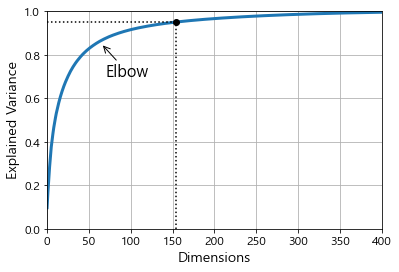

In [26]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

## 8.3.7 압축을 위한 PCA
- 차원을 축소하고 난 후에는 훈련 세트의 크기가 줄어든다.
    - 분산을 유지한 압축 => 알고리즘의 훈련 속도 향상
--- 
- 재구성 오차: 원본 데이터와 재구성된 데이터 사이의 평균 제곱 거리
    - 재구성된 데이터? => 압축된 데이터셋에 PCA투영의 변환을 반대로 적용하여 원래의 데이터셋 차원을 가지는 데이터셋으로 되돌릴 수 있다. 그래도 분산이 100%가 아닌 상태로 되될리는 것이기 때문에(유실된 5% 분산이 있음) 원본 데이터와 동일한 데이터를 얻을 수는 없다.
    <br><br>
    - 역변환 공식: $X_{recovered} = X_{d-proj}W_d^T$

In [ ]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_reduced = pca.inverse_transform(X_reduced)

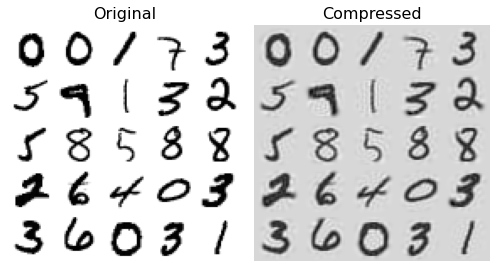

## 8.3.8 랜덤 PCA

In [ ]:
rnd_pca = PCA(n_components = 154, svd_solver = 'randomized')
#svd_solver를 randomized로 설정: 확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근갓값을 빠르게 찾는다.
X_reduced = rnd_pca.fit_transform(X_train)

- svd_solver의 기본 값은 'auto'
    - m이나 n이 500보다 크고 d가 m이나 n의 80%보다 작으면 사이킷 런은 자동으로 랜덤 PCA알고리즘 사용
    - 완전한 SVD 방식을 강제하려면 svd_solver 매개변수를 'full'로 지정

## 8.3.9 점진적 PCA

#### PCA구현의 문제: SVD알고리즘을 실행하기 위해 전체 훈련 세트를 메모리에 올려야 한다.
    - 점진적 PCA(incremental PCA): 훈련 세트를 미니배치로 나눈 뒤, IPCA알고리즘에 하나씩 주입
    - 훈련 세트가 클 때 유용하다.

In [13]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches): #split을 이용해 100개의 미니배치로 나눈다. 
    #np.split과 다른점: indices or section 파라미터(integar)가 반드시 맞아 떨어지게 나눌 필요 없다.
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

#### 또 다른 방법
넘파이의 memmap 파이썬 클래스를 사용해 하드 디스크의 이진 파일에 저장된 매우 큰 배열을 메모리에 있는 것처럼 다루기

In [ ]:
filename = "my_mnist.data"
m, n = X_train.shape
X_mm = np.memmap(filename, dtype = 'float32', mode = 'readonly', shape = (m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components= 154, batch_size = batch_size)
inc_pca.fit(X_mm)

# 8.4 커널 PCA


- PCA, SVM 등에서 사용되는 Kernel을 사용하여 비선형 데이터를 고차원 공간으로 매핑하는 것

In [ ]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf',gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X)
#kernel의 종류: 선형 커널(단순한 PCA와 동일), RBF커널, 시그모이드 커널 등이 있다.

## 8.4.1 커널 선택과 하이퍼파라미터 튜닝

- kPCA는 비지도 학습이므로 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 없다.  
    - 따라서, 그리드 탐색을 사용하여 가장 좋은 커널과 하이퍼파라미터를 선택
    - 또는 완전한 비지도 학습 방법으로, 가장 낮은 재구성 오차를 만드는 커널과 하이퍼파라미터를 선택하는 방식.
        - 하지만 재구성은 선형 PCA만큼 쉽지 않다.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([ 
        ("kpca", KernelPCA(n_components=2)), #kPCA를 사용하여 2차원으로 축소
        ("log_reg", LogisticRegression(solver="lbfgs")) #로지스틱 회귀 적용 (분류 문제)
    ])

#그리드 탐색을 통해 가장 좋은 값 찾기
param_grid = [{ 
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

In [ ]:
#가장 좋은 커널과 하이퍼파라미터는 best_params_변수에 저장
print(grid_search.best_params_)

- 재구성 원상(역상): 재구성된 포인트에 가깝게 매핑된 원본 공간의 포인트를 찾는 것
    - 원상(역상): 어떤 함수($f:X-> T$)에 대한 공역($Y$)원소에 대응하는 정의역($X$) 원소로 이뤄진 부분 집합

In [ ]:
#fit_inverse_transform = True로 지정하면 자동으로 재구성 수행
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
#재구성 원상 오차 계산
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

# 8.5 LLE(지역 선형 임베딩)

- 지역 선형 임베딩(locally linear embedding, LLE): 비선형 차원 축소(nonlinear dimensionality reduction, NLDR) 기술
    - 투영에 의존하지 않는 매니폴드 학습.
    - 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정 => 잘 보존되는 훈련세트의 저차원 표현 찾기

In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

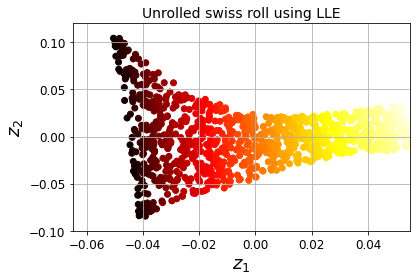

- 스위스롤이 완전히 펼쳐진 모습. 하지만 샘플간의 거리가 잘 유지되지 않았다.

#### LLE가 작동하는 방식
1. 알고리즘이 각 훈련 샘플 $x^{i}$에 대해 가장 가까운 $k$개의 샘플을 찾는다. 
2. 이 이웃에 대한 선형 함수로 $x^{i}$를 재구성한다. 
    - $x^{i}$와 $\sum_{j = 1}^mw_{i,j}x^{(j)}$사이의 제곱 거리가 최소가 되는 $w_{i,j}$를 찾는 것이다
    - $x^{(j)}$가 $x^{(i)}$의 가장 가까운 $k$개 이웃 중 하나가 아닐 경우: $w_{i,j} = 0$
3. $\hat W$은 훈련 샘플 사이에 있는 지역 선형 관계를 담게 되고
    - $W$: 가중치 $w_{i,j}$를 모두 담은 행렬
    - $w_{i,j}$: $x^{i}$와 $\sum_{j = 1}^mw_{i,j}x^{(j)}$사이의 제곱 거리가 최소가 되는 $w_{i,j}$를 모두 담은 행렬
4. 이 관계가 보존되도록 훈련 샘플을 d차원 공간으로 매핑!
--- 
이 알고리즘은 대량의 데이터셋에는 적용하기 어렵다(계산 복잡도 문제)

# 8.6 다른 차원 축소 기법

### 랜덤 투영
- 랜덤한 선형 투영을 사용해 데이터를 저차우너 공간으로 투영

#### 다차원 스케일링(multidiemnsional scaling, MDS)
- 샘플 간의 거리를 보존하면서 차원을 축소

#### Isomap
- 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만들고, 샘플 간의 지오데식 거리를 유지하면서 차원을 축소
    - 지오데식 거리(geodesic distance): 두 노드 사이의 최단 경로를 이루는 노드의 수

#### t-SNE(t-distributed stochastic neighbor embedding)
- 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소 
- 시각화에 많이 사용, 고차원 공간에 있는 샘플의 군집을 시각화 할 때 사용

#### 선형 판별 분석(linear discriminant analysis, LDA)
- 사실 분류 알고리즘
- 훈련 과정에서는 클래스 사이를 가장 잘 구분하는 축을 학습. => 축을 이용해 데이터가 투영되는 초평면 정의
- 장점: 투영을 통해 클래스를 멀리 떨어지게 유지 => 분류 알고리즘 적용 전 차원 축소 용이